In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import TruncatedSVD

In [2]:
test = pd.read_csv("../Data/test.csv").set_index('id')
train = pd.read_csv("../Data/train.csv").set_index('id')

In [3]:
trips = pd.read_csv('../Data/trip.csv')

In [4]:
valoresReales = trips.loc[trips.id.isin(test.index), ['id','duration']]
valoresReales = valoresReales.set_index('id')

In [5]:
def Score(pred):
    return mean_squared_error(valoresReales.duration.values, pred)

In [6]:
y_train = train.duration.values
X_train = train.drop('duration',axis=1)

In [7]:
x_test = test.copy()

In [8]:
imputer = preprocessing.Imputer(missing_values='NaN', strategy='mean', axis=0)
X_train = imputer.fit_transform(X_train)

In [9]:
imputer = preprocessing.Imputer(missing_values='NaN', strategy='mean', axis=0)
x_test = imputer.fit_transform(x_test)

In [10]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train) # devuelve una matriz
x_test = scaler.transform(x_test)

In [11]:
X_train = preprocessing.normalize(X_train,norm='l1')
x_test = preprocessing.normalize(x_test,norm='l1')

In [12]:
U,E,V = np.linalg.svd(X_train,full_matrices=0)

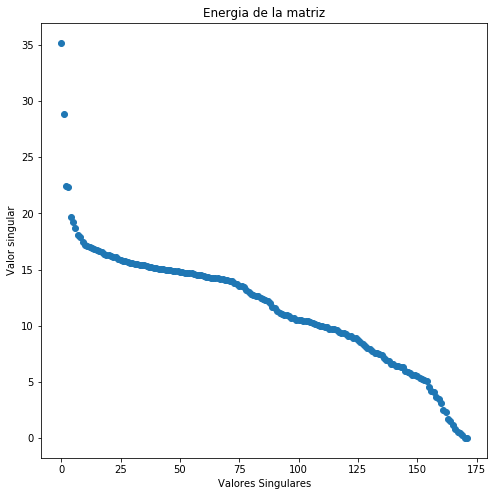

In [38]:
plt.figure(figsize=(8,8))
plt.xlabel("Valores Singulares")
plt.ylabel('Valor singular')
plt.title("Energia de la matriz")
plt.plot(E, "o")
plt.show()

In [22]:
def Energia(E):
    return sum([e ** 2 for e in E])

def ParticipacionEnLaEnergia(cant_val, E):
    return Energia(E[0:cant_val]) / Energia(E)

In [35]:
ParticipacionEnLaEnergia(120, E)

0.93070384074982149

In [ ]:
svd = TruncatedSVD(n_components=120,n_iter=7, random_state=42)
x_train_k = svd.fit_transform(X_train)

In [ ]:
svd = TruncatedSVD(n_components=120, n_iter=7, random_state=42)
x_test_k = svd.fit_transform(x_test)

### Random Forest

In [12]:
randomForest = RandomForestRegressor(bootstrap=True)
randomForest = randomForest.fit(X_train, y_train)
y_pred = randomForest.predict(x_test)

In [19]:
df = pd.DataFrame({"id": list(test.index.values), 'duration':y_pred})
df = df.set_index('id')

In [68]:
print(Score(y_pred))

44697751.227


### Ada Boost Regressor

In [66]:
tree = DecisionTreeRegressor(max_depth=4)
tree = tree.fit(X_train, y_train)
y_pred_one_tree = tree.predict(x_test)

In [69]:
print(Score(y_pred_one_tree))

43450282.4225


In [72]:
adaBoost = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                          n_estimators=10)

adaBoost = adaBoost.fit(X_train, y_train)
y_pred_ada_Boost = adaBoost.predict(x_test)

In [73]:
print(Score(y_pred_ada_Boost))

44001339.1643


### Gradient Boosting Regressor

In [76]:
gradBoost = GradientBoostingRegressor()
gradBoost = gradBoost.fit(X_train, y_train)
y_pred_gradBoost = gradBoost.predict(x_test)

In [77]:
print(Score(y_pred_gradBoost))

44677995.9943


#### Vamos a buscar los mejores Hiper Parametros de Gradient Boosting

In [83]:
param_grid = {'n_estimators':range(20,81,10)}

reg = GradientBoostingRegressor(learning_rate=0.1,\
                                 min_samples_split=500,\
                                 min_samples_leaf=50,\
                                 max_depth=8,\
                                 max_features='sqrt',\
                                 subsample=0.8,\
                                 random_state=10)

gsearch1 = GridSearchCV(estimator = reg,\
                        param_grid = param_grid,\
                        iid=False,\
                        cv=3,\
                        verbose=5,\
                       )

gsearch1.fit(X_train,y_train)

Fitting 3 folds for each of 7 candidates, totalling 21 fits
[CV] n_estimators=20 .................................................
[CV] .................. n_estimators=20, score=0.245351, total= 2.7min
[CV] n_estimators=20 .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.7min remaining:    0.0s


[CV] .................. n_estimators=20, score=0.263975, total=  49.1s
[CV] n_estimators=20 .................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  3.5min remaining:    0.0s


[CV] .................. n_estimators=20, score=0.271373, total=  50.1s
[CV] n_estimators=30 .................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  4.3min remaining:    0.0s


[CV] .................. n_estimators=30, score=0.308113, total= 1.1min
[CV] n_estimators=30 .................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  5.5min remaining:    0.0s


[CV] .................. n_estimators=30, score=0.335873, total= 1.3min
[CV] n_estimators=30 .................................................
[CV] .................. n_estimators=30, score=0.316534, total= 1.3min
[CV] n_estimators=40 .................................................
[CV] .................. n_estimators=40, score=0.343733, total= 1.4min
[CV] n_estimators=40 .................................................
[CV] .................. n_estimators=40, score=0.381781, total= 1.6min
[CV] n_estimators=40 .................................................
[CV] .................. n_estimators=40, score=0.364624, total= 2.0min
[CV] n_estimators=50 .................................................
[CV] .................. n_estimators=50, score=0.375830, total= 1.9min
[CV] n_estimators=50 .................................................
[CV] .................. n_estimators=50, score=0.413351, total= 1.9min
[CV] n_estimators=50 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed: 40.7min finished


KeyboardInterrupt: 

### XGBoost

In [18]:
from xgboost import XGBRegressor

In [23]:
Xtrain, Xval, ytrain, yval = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [30]:
reg = XGBRegressor(max_depth=8,n_estimators=400,min_child_weight=24,gamma=0,colsample_bytree = 1.0,subsample= 0.2,learning_rate=0.01)

In [31]:
reg.fit(Xtrain,ytrain, eval_set=[(Xval, yval)], early_stopping_rounds=30, verbose=5)

[0]	validation_0-rmse:1305.14
Will train until validation_0-rmse hasn't improved in 30 rounds.
[5]	validation_0-rmse:1259.78
[10]	validation_0-rmse:1217.26
[15]	validation_0-rmse:1176.98
[20]	validation_0-rmse:1140.69
[25]	validation_0-rmse:1104.29
[30]	validation_0-rmse:1070.85
[35]	validation_0-rmse:1038.19
[40]	validation_0-rmse:1006.57
[45]	validation_0-rmse:978.659
[50]	validation_0-rmse:952.117
[55]	validation_0-rmse:927.279
[60]	validation_0-rmse:902.134
[65]	validation_0-rmse:880.167
[70]	validation_0-rmse:860.758
[75]	validation_0-rmse:841.766
[80]	validation_0-rmse:823.122
[85]	validation_0-rmse:806.262
[90]	validation_0-rmse:790.355
[95]	validation_0-rmse:774.343
[100]	validation_0-rmse:759.716
[105]	validation_0-rmse:746.552
[110]	validation_0-rmse:735.256
[115]	validation_0-rmse:723.181
[120]	validation_0-rmse:712.126
[125]	validation_0-rmse:703.538
[130]	validation_0-rmse:694.213
[135]	validation_0-rmse:685.64
[140]	validation_0-rmse:676.777
[145]	validation_0-rmse:668.64

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1.0,
       gamma=0, learning_rate=0.01, max_delta_step=0, max_depth=8,
       min_child_weight=24, missing=None, n_estimators=400, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=0.2)

In [35]:
y_pred_xgboost = reg.predict(x_test)

In [36]:
print(Score(y_pred_xgboost))

44276959.1705


Parametros a seleccionar

1. 'subsample':[i/10.0 for i in range(1,5)]
2. 'max_depth': [3,4,5,6,7,8,9,10]->8
3. 'min_child_weight':[18,19,20,21,22,23,24,25] -> 25 / 10
4. 'gamma':[i/10.0 for i in range(0,2)] -> 0
5. 'subsample':[i/10.0 for i in range(1,11)] -> 0
6. 'colsample_bytree':[i/10.0 for i in range(6,11)] 10

In [ ]:
Xtrain, Xval, ytrain, yval = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [ ]:
fit_dict = {
          "eval_set":[(Xval, yval)],
          "early_stopping_rounds":30,
          "verbose":5
          }

In [ ]:
alg = XGBRegressor(max_depth=8,
                   min_child_weight=24,
                   n_estimators=400,
                   gamma=0,
                   colsample_bytree = 1.0,
                   subsample= 0.2,
                   learning_rate=0.01)

In [ ]:
params = {'subsample':[i/10.0 for i in range(1,5)]}

In [ ]:
reg = GridSearchCV(estimator = alg,
                   param_grid = params,
                   verbose = True,
                   fit_params = fit_dict,
                   cv=3)

In [ ]:
reg.fit(Xtrain,ytest)

In [ ]:
print(Score(reg.best_estimator_.predict(X_train)))
print(reg.best_estimator_)
print(reg.best_params_)

In [37]:
df = pd.DataFrame({"id": list(test.index.values), 'duration':y_pred_xgboost})
df = df.set_index('id')
df.to_csv("~/sampleSubmission.csv")